### Drive mount for dataset access

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
!pip install scikit-learn

### Import Dataset

In [62]:
df = pd.read_excel('/content/drive/MyDrive/Kenya_Data.xlsx')

### **Dataset Overview:**

Let's take a look at the first few rows of your dataset:

In [63]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424
Order Number,25175,25175,25166,25101,25055,25035,25032,25024,25021,25008,...,20859,20860,20861,20862,20863,20864,20865,20866,20867,20868
Order Status,Processing,Processing,Failed,Processing,Completed,Completed,Cancelled,Cancelled,Processing,Cancel Request,...,Completed,Cancelled,Completed,Cancelled,Completed,Completed,Completed,Completed,Completed,Cancelled
Order Date,2023-12-01 11:54:10,2023-12-01 11:54:10,2023-12-01 07:44:52,2023-11-10 12:00:40,2023-11-01 10:21:50,2023-10-22 07:14:09,2023-10-19 06:27:24,2023-10-16 15:23:25,2023-10-15 15:31:20,2023-10-13 15:44:45,...,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38
First Name (Billing),Kungu,Kungu,Mary,Catherine,James,Yonko,Liza,Rodgers,Malcolm,Elizabeth,...,Gloria,Declan,LENZER,Millie,Millie,Stephen,Prince,Alieu,Sabastian,Jonathan
Last Name (Billing),Munyi,Munyi,Gicheche,Makau,Mbanacho,Kilasi,Njeru,Amimo,Mutiso,Otieno,...,Lumumba,Imbwaka,OBELL,Kimani,Kimani,Njuguna,Chilow,bah,Nzuki,Koome
Company (Billing),NaN,NaN,DPO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NGIYA HEALTH CENTER - KCCB-KARP,NaN,NaN,NaN,AUC,AUC,NaN,NaN
Address 1&2 (Billing),"Waterfront Gardens Estate, Loresho House 137","Waterfront Gardens Estate, Loresho House 137","Kasarani, Kasarani,garage","Kenya Forest Service, Cjery apartments","Utawala Eastern bypass, Gesora Rd","L4B, Loresho springs apartments , Opp Mountain...",Muthenge,"Mukandu Rd, Next to The Ark Junior School","Kodi 2 Rd, 26","Morningside Park Apartments, along USIU Road, ...",...,"Kasarani Claycity near Camp Entumoto, G7, Ya M...","Gachororo, Bema",NGIYA,"Kamakis, Sundail","Kamakis, Sundail",Ngara,NAIROBI,NAIROBI,"YAYA Center, opposite yaya center",65501-00607
City (Billing),Nairobi,Nairobi,Nairobi,Wote,Nairobi,Nairobi,Chuka,South B,Nairobi,Nairobi,...,Kasarani,Juja,Nairobi,Ruiru,Ruiru,Nairobi,nairobi,nairobi,nairobi,Kahawa West Nairobi
State Code (Billing),KE30,KE30,KE30,KE23,KE30,KE30,KE41,KE30,KE30,KE30,...,KE30,KE13,KE38,KE13,KE13,KE30,KE30,KE30,KE30,KE30
Postcode (Billing),16001,16001,2700,90300,894100100,00100,25260400,52428,00200,00800,...,00100,00000,40603,00232,00232,O0600,00621,00621,00621,00607


In [64]:
df.isnull().sum()

Order Number                  0
Order Status                  0
Order Date                    0
First Name (Billing)          0
Last Name (Billing)           0
Company (Billing)          1068
Address 1&2 (Billing)         0
City (Billing)                0
State Code (Billing)          0
Postcode (Billing)            2
Country Code (Billing)        0
Customer Note              1210
Email (Billing)               1
Phone (Billing)               0
First Name (Shipping)         0
Last Name (Shipping)          0
Address 1&2 (Shipping)        0
City (Shipping)               0
State Code (Shipping)         1
Postcode (Shipping)           2
Country Code (Shipping)       0
Payment Method Title          0
Cart Discount Amount          0
Order Subtotal Amount         0
Shipping Method Title         0
Order Shipping Amount         0
Order Total Amount            0
Order Total Tax Amount        0
SKU                         880
Item #                        0
Item Name                     0
Category

In [65]:
df.dtypes

Order Number                        int64
Order Status                       object
Order Date                 datetime64[ns]
First Name (Billing)               object
Last Name (Billing)                object
Company (Billing)                  object
Address 1&2 (Billing)              object
City (Billing)                     object
State Code (Billing)               object
Postcode (Billing)                 object
Country Code (Billing)             object
Customer Note                      object
Email (Billing)                    object
Phone (Billing)                    object
First Name (Shipping)              object
Last Name (Shipping)               object
Address 1&2 (Shipping)             object
City (Shipping)                    object
State Code (Shipping)              object
Postcode (Shipping)                object
Country Code (Shipping)            object
Payment Method Title               object
Cart Discount Amount                int64
Order Subtotal Amount             

In [66]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Order Number                        int64
Order Status                       object
Order Date                 datetime64[ns]
First Name (Billing)               object
Last Name (Billing)                object
Company (Billing)                  object
Address 1&2 (Billing)              object
City (Billing)                     object
State Code (Billing)               object
Postcode (Billing)                 object
Country Code (Billing)             object
Customer Note                      object
Email (Billing)                    object
Phone (Billing)                    object
First Name (Shipping)              object
Last Name (Shipping)               object
Address 1&2 (Shipping)             object
City (Shipping)                    object
State Code (Shipping)              object
Postcode (Shipping)                object
Country Code (Shipping)            object
Payment Method Title               object
Cart Discount Amount                int64
Order Subtotal Amount             

In [67]:
drop_coumns = ['Coupon Code', 'Discount Amount', 'Item #', 'Discount Amount Tax','Last Name (Billing)', 'Company (Billing)', 'Address 1&2 (Billing)', 'Postcode (Billing)','Country Code (Billing)', 'Customer Note', 'Email (Billing)', 'Phone (Billing)', 'Last Name (Shipping)', 'Address 1&2 (Shipping)', 'State Code (Shipping)','Postcode (Shipping)', 'Country Code (Shipping)', 'Cart Discount Amount', 'Order Total Tax Amount']
df = df.drop(columns=drop_coumns)

df

,Order Number,Order Status,Order Date,First Name (Billing),City (Billing),State Code (Billing),First Name (Shipping),City (Shipping),Payment Method Title,Order Subtotal Amount,Shipping Method Title,Order Shipping Amount,Order Total Amount,SKU,Item Name,Category Name,Quantity,Item Cost
0,25175,Processing,2023-12-01 11:54:10,Kungu,Nairobi,KE30,Kungu,Nairobi,Pay on delivery,4800,Flat rate,500,5300,MJK-CAR-101,HP 305 Black Ink Cartridge,Cartridge,1,2400
1,25175,Processing,2023-12-01 11:54:10,Kungu,Nairobi,KE30,Kungu,Nairobi,Pay on delivery,4800,Flat rate,500,5300,MJK-CAR-102,HP 305 Tri-color Ink Cartridge,Cartridge,1,2400
2,25166,Failed,2023-12-01 07:44:52,Mary,Nairobi,KE30,Mary,Nairobi,DPO Payment Gateway (20% Payment Charges Extra.),69990,Flat rate,500,84588,MJK-15102312-101,"Samsung 43"" UA43CU8000UXKE Crystal Smart TV - ...",Television,1,69990
3,25101,Processing,2023-11-10 12:00:40,Catherine,Wote,KE23,Catherine,Wote,Pay on delivery,10895,Flat rate,500,11395,MJK-35401006-101,Magic Bullet MB4-1149M 11 Piece Set,Mixture,1,10895
4,25055,Completed,2023-11-01 10:21:50,James,Nairobi,KE30,James,Nairobi,Pay on delivery,16100,Flat rate,500,16600,MJK-PSS-F30-101,Yamaha Portable Keyboards PSS-F30,Keyboards,1,16100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,20864,Completed,2021-06-01 09:50:38,Stephen,Nairobi,KE30,Stephen,Nairobi,Pay on delivery,120000,Flat rate,400,120400,NaN,"Samsung Galaxy S22 Ultra(12 GB Ram, 256 GB Sto...",Smartphones,9,120000
1421,20865,Completed,2021-06-01 09:50:38,Prince,nairobi,KE30,Prince,nairobi,Pay on delivery,50000,Local Shop pickup,0,50000,NaN,"Samsung A32(6 GB Ram,128 GB Storage)",Smartphones,9,25000
1422,20866,Completed,2021-06-01 09:50:38,Alieu,nairobi,KE30,Alieu,nairobi,Pay on delivery,160000,Local Shop pickup,0,160000,NaN,Samsung Galaxy Z Fold3 5G,Smartphones,9,160000
1423,20867,Completed,2021-06-01 09:50:38,Sabastian,nairobi,KE30,Sabastian,nairobi,Pay on delivery,26000,Flat rate,400,26400,NaN,"OPPO A77(4 GB Ram,128GB Storage)Sky Blue",Smartphones,9,26000


### Checking NaN Values in Data

In [68]:
nan_columns = df.isnull().sum()
print("Columns with NaN values:")
print(nan_columns[nan_columns > 0])

Columns with NaN values:
SKU    880
dtype: int64


## Handled NaN Values as 0 (Zero)

In [69]:
columns_to_replace_with_zero = ['Shipping Method Title', 'SKU']

df[columns_to_replace_with_zero] = df[columns_to_replace_with_zero].fillna(0)

In [70]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424
Order Number,25175,25175,25166,25101,25055,25035,25032,25024,25021,25008,...,20859,20860,20861,20862,20863,20864,20865,20866,20867,20868
Order Status,Processing,Processing,Failed,Processing,Completed,Completed,Cancelled,Cancelled,Processing,Cancel Request,...,Completed,Cancelled,Completed,Cancelled,Completed,Completed,Completed,Completed,Completed,Cancelled
Order Date,2023-12-01 11:54:10,2023-12-01 11:54:10,2023-12-01 07:44:52,2023-11-10 12:00:40,2023-11-01 10:21:50,2023-10-22 07:14:09,2023-10-19 06:27:24,2023-10-16 15:23:25,2023-10-15 15:31:20,2023-10-13 15:44:45,...,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38
First Name (Billing),Kungu,Kungu,Mary,Catherine,James,Yonko,Liza,Rodgers,Malcolm,Elizabeth,...,Gloria,Declan,LENZER,Millie,Millie,Stephen,Prince,Alieu,Sabastian,Jonathan
City (Billing),Nairobi,Nairobi,Nairobi,Wote,Nairobi,Nairobi,Chuka,South B,Nairobi,Nairobi,...,Kasarani,Juja,Nairobi,Ruiru,Ruiru,Nairobi,nairobi,nairobi,nairobi,Kahawa West Nairobi
State Code (Billing),KE30,KE30,KE30,KE23,KE30,KE30,KE41,KE30,KE30,KE30,...,KE30,KE13,KE38,KE13,KE13,KE30,KE30,KE30,KE30,KE30
First Name (Shipping),Kungu,Kungu,Mary,Catherine,James,Yonko,Liza,Rodgers,Malcolm,Elizabeth,...,Gloria,Declan,LENZER,Millie,Millie,Stephen,Prince,Alieu,Sabastian,Jonathan
City (Shipping),Nairobi,Nairobi,Nairobi,Wote,Nairobi,Nairobi,Chuka,South B,Nairobi,Nairobi,...,Kasarani,Juja,Nairobi,Ruiru,Ruiru,Nairobi,nairobi,nairobi,nairobi,Kahawa West Nairobi
Payment Method Title,Pay on delivery,Pay on delivery,DPO Payment Gateway (20% Payment Charges Extra.),Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,...,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,DPO Payment Gateway,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery
Order Subtotal Amount,4800,4800,69990,10895,16100,8528,103000,617,7244,28758,...,25000,32500,25000,21499,21499,120000,50000,160000,26000,52000


In [71]:
companies = ['Apple', 'Cursor', 'HP', 'Nokia', 'Oppo', 'Samsung', 'Epson', 'Acer', 'Von', 'Hikvision', 'Toshiba', 'Lexar', 'Display', 'Crucial', 'Vision Plus', 'Sony', 'Mi', 'Transcend', 'Infinix', 'Realme', 'Oneplus', 'Google', 'LG', 'EcoTank', 'Test', 'iTel', 'Vivo', 'Xiaomi', ]
df['Company'] = df['Item Name'].apply(lambda x: next((company for company in companies if company in x), 'Other_Company'))

df.head().T

,0,1,2,3,4
Order Number,25175,25175,25166,25101,25055
Order Status,Processing,Processing,Failed,Processing,Completed
Order Date,2023-12-01 11:54:10,2023-12-01 11:54:10,2023-12-01 07:44:52,2023-11-10 12:00:40,2023-11-01 10:21:50
First Name (Billing),Kungu,Kungu,Mary,Catherine,James
City (Billing),Nairobi,Nairobi,Nairobi,Wote,Nairobi
State Code (Billing),KE30,KE30,KE30,KE23,KE30
First Name (Shipping),Kungu,Kungu,Mary,Catherine,James
City (Shipping),Nairobi,Nairobi,Nairobi,Wote,Nairobi
Payment Method Title,Pay on delivery,Pay on delivery,DPO Payment Gateway (20% Payment Charges Extra.),Pay on delivery,Pay on delivery
Order Subtotal Amount,4800,4800,69990,10895,16100


### **Descriptive Statistics:**

Use summary statistics like mean, median, mode, range, and standard deviation to describe the central tendency and spread of numeric features.

In [72]:
df.describe()

,Order Number,Order Date,Order Subtotal Amount,Order Shipping Amount,Order Total Amount,Quantity,Item Cost
count,1425.000000,1425,1.425000e+03,1425.000000,1.425000e+03,1425.000000,1425.000000
mean,21320.229474,2022-11-05 19:15:56.397768192,5.653165e+04,343.719298,5.797467e+04,1.562105,44763.488421
min,20272.000000,2021-06-01 09:50:38,5.000000e+00,0.000000,5.000000e+00,1.000000,5.000000
25%,20602.000000,2022-11-07 11:25:41,1.850000e+04,400.000000,1.890000e+04,1.000000,17500.000000
50%,20959.000000,2022-12-11 18:38:24,2.400000e+04,400.000000,2.450000e+04,1.000000,22000.000000
75%,21593.000000,2023-03-01 15:28:58,4.950000e+04,500.000000,4.990000e+04,1.000000,42000.000000
max,25175.000000,2023-12-01 11:54:10,1.723992e+06,1000.000000,1.724492e+06,11.000000,409200.000000
std,1079.845497,NaN,1.093516e+05,196.325600,1.124931e+05,1.857409,54059.467710


### **Handling Missing Data:**

Identify and handle missing data. You can check for missing values in your dataset using the following:

In [73]:
# Check for missing values
df.isnull().sum()

Order Number             0
Order Status             0
Order Date               0
First Name (Billing)     0
City (Billing)           0
State Code (Billing)     0
First Name (Shipping)    0
City (Shipping)          0
Payment Method Title     0
Order Subtotal Amount    0
Shipping Method Title    0
Order Shipping Amount    0
Order Total Amount       0
SKU                      0
Item Name                0
Category Name            0
Quantity                 0
Item Cost                0
Company                  0
dtype: int64

### *Correlation Analysis:*

Interpretation of the correlation matrix:



*   A value close to 1 indicates a strong positive correlation.
*   A value close to -1 indicates a strong negative correlation.
*   A value close to 0 indicates a weak or no correlation.


In [74]:
# correlation_matrix = df.corr()

# # Plotting the correlation matrix as a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()


### Box Plot for Outlier Detection:

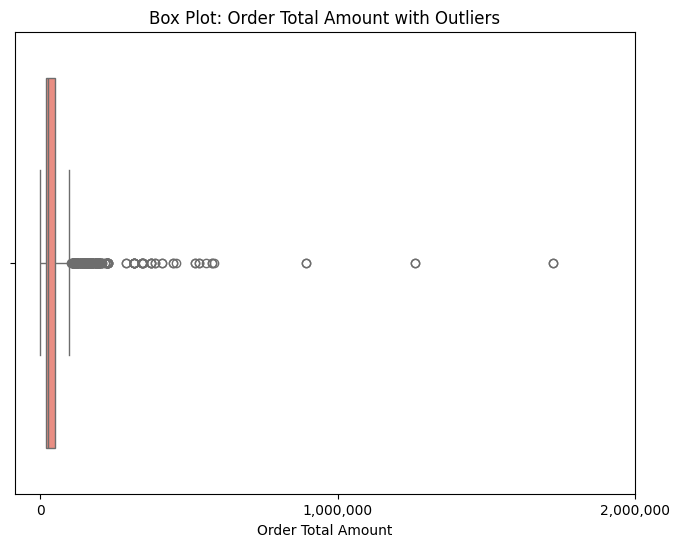

In [75]:
# Box Plot with Outliers

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=df['Order Total Amount'], color='salmon')

# Customize x-axis ticks
tick_values = np.arange(0, df['Order Total Amount'].max() + 1000000, 1000000)
ax.set_xticks(tick_values)
ax.set_xticklabels([f'{val:,}' for val in tick_values])  # Format ticks with commas for better readability

# Set plot title and labels
plt.title('Box Plot: Order Total Amount with Outliers')
plt.xlabel('Order Total Amount')
plt.show()


### Removing Outliers :

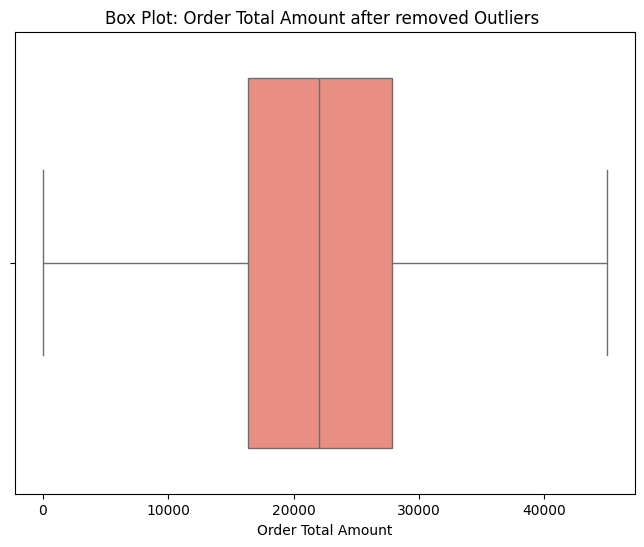

In [76]:
Q1 = df['Order Total Amount'].quantile(0.25)
Q3 = df['Order Total Amount'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['Order Total Amount'] >= Q1 - 1.5 * IQR) & (df['Order Total Amount'] <= Q3 + 1.5 * IQR)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Order Total Amount'],showfliers=False, color='salmon')
plt.title('Box Plot: Order Total Amount after removed Outliers ')
plt.xlabel('Order Total Amount')
plt.show()


### Univariate Analysis for Numeric Variables:

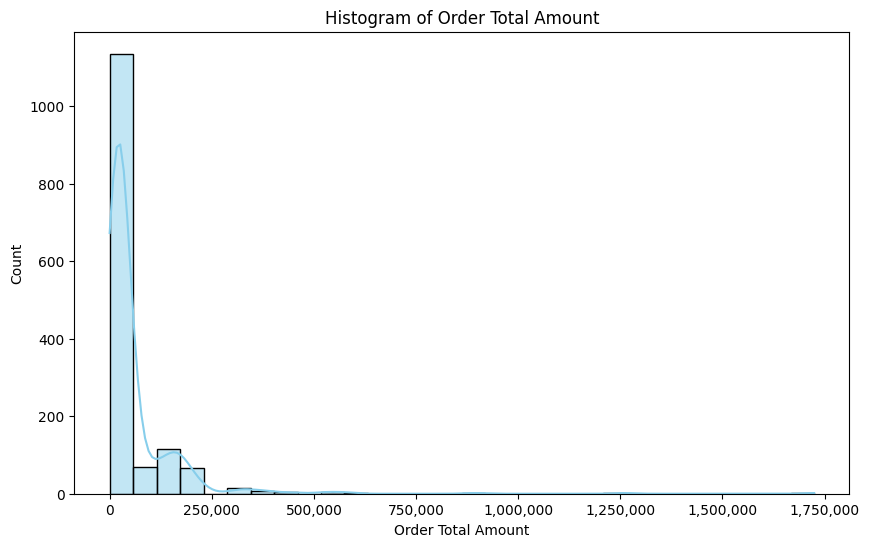

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Order Total Amount'], bins=30, kde=True, color='skyblue', stat='count')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Histogram of Order Total Amount')
plt.xlabel('Order Total Amount')
plt.ylabel('Count')
plt.show()


### Univariate Analysis for Categorical Variables:

<ipython-input-78-e2dbc4c49d97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Order Status'], palette='viridis')


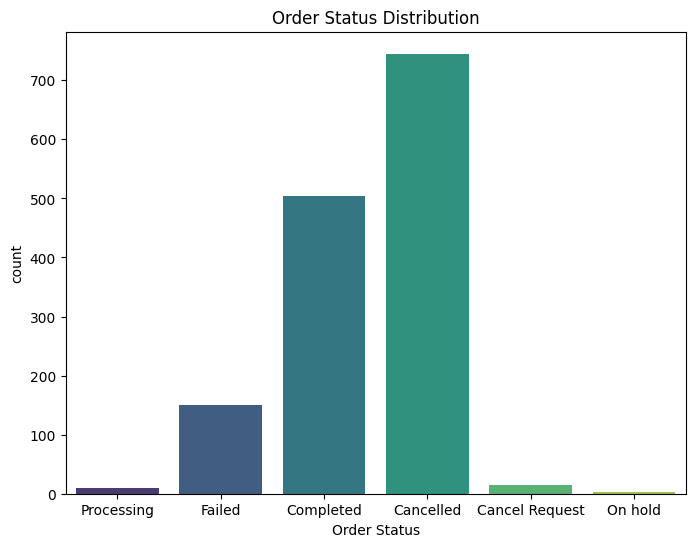

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Order Status'], palette='viridis')
plt.title('Order Status Distribution')
plt.show()


<ipython-input-79-238e985fec22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method Title', data=df, palette='magma')


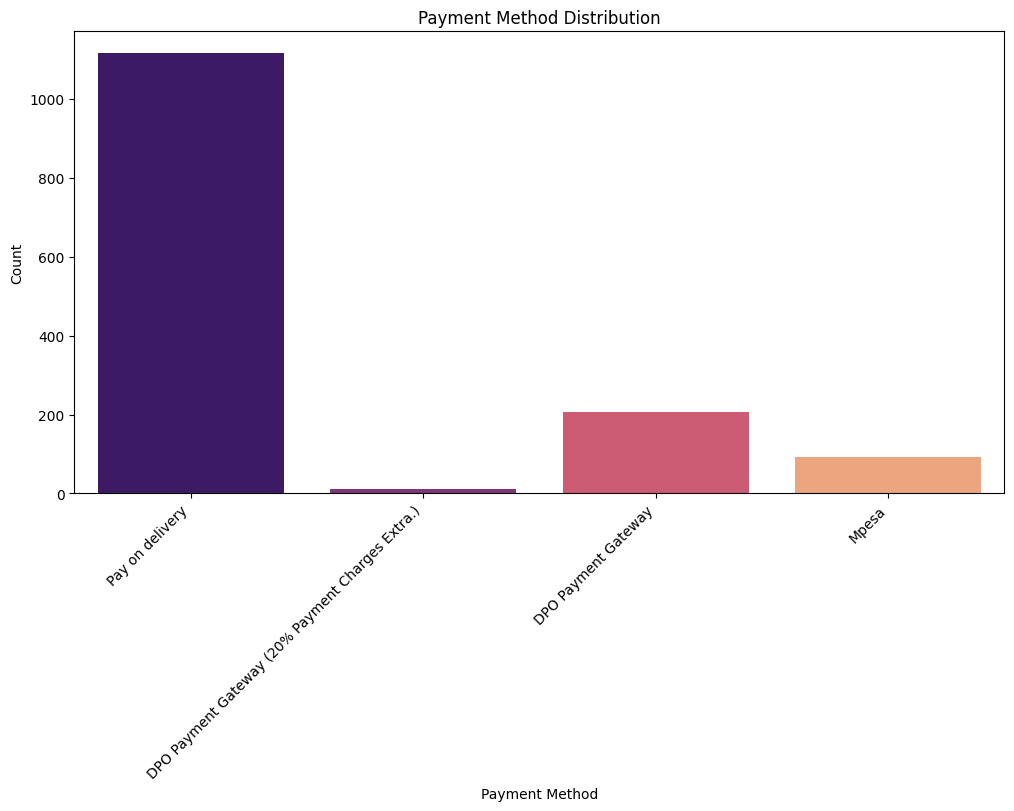

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment Method Title', data=df, palette='magma')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

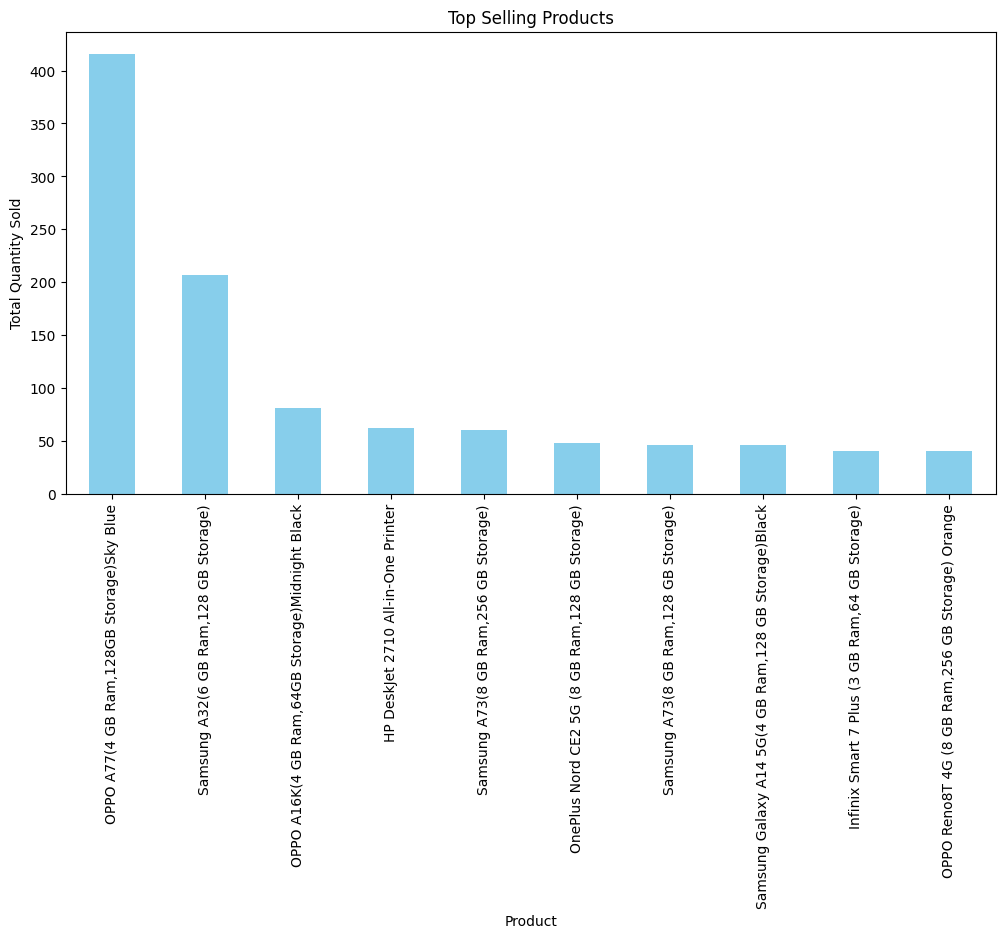

In [80]:
top_products = df.groupby('Item Name')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.show()


### Bivariate Analysis for Numeric-Numeric Relationships:

<ipython-input-81-2e384580c121>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Order Shipping Amount', y='Quantity', data=df, palette='viridis')


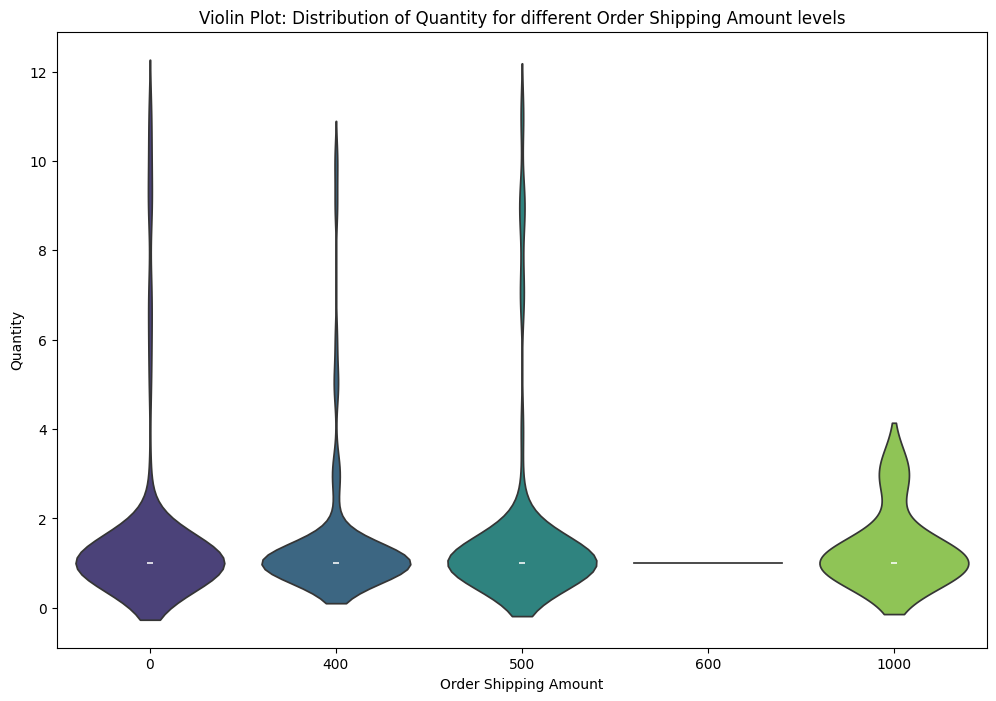

In [81]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Order Shipping Amount', y='Quantity', data=df, palette='viridis')
plt.title('Violin Plot: Distribution of Quantity for different Order Shipping Amount levels')
plt.xlabel('Order Shipping Amount')
plt.ylabel('Quantity')
plt.show()


### Bivariate Analysis for Categorical-Categorical Relationships:

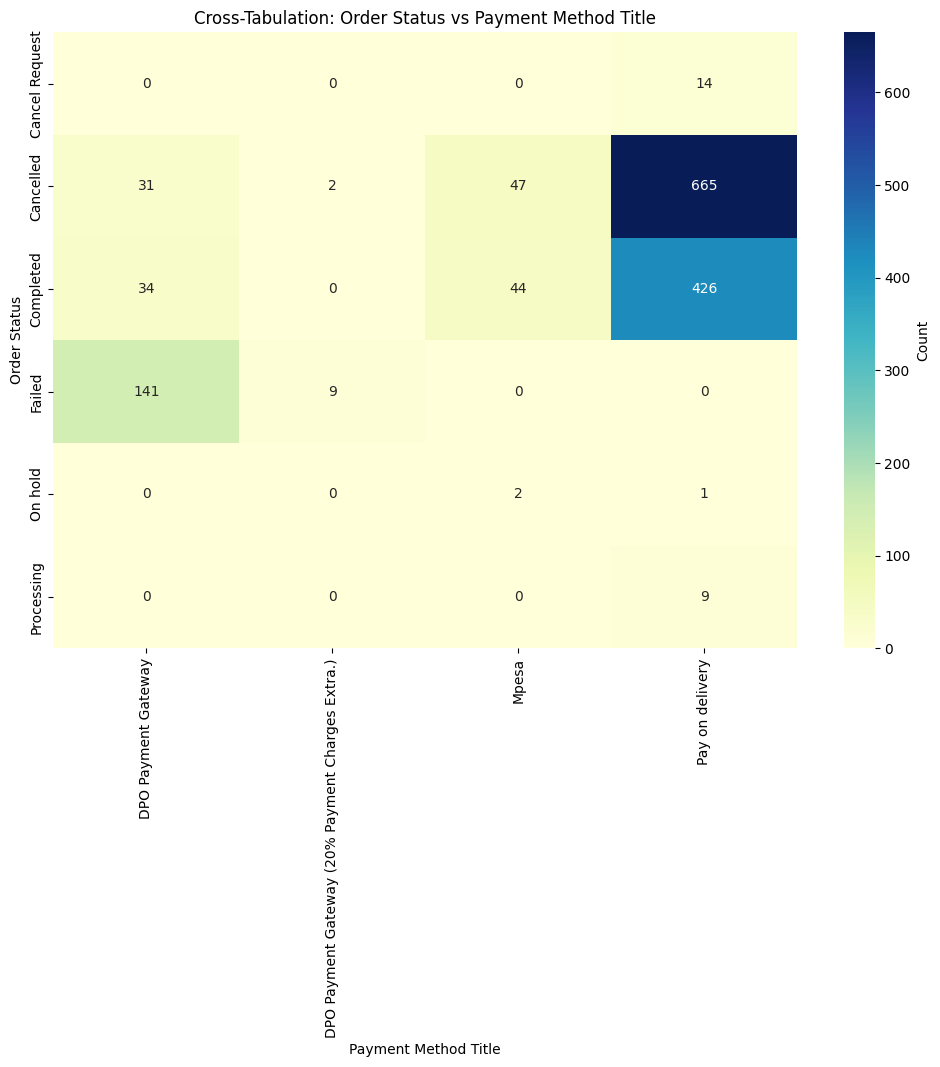

In [82]:
cross_tab = pd.crosstab(df['Order Status'], df['Payment Method Title'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Count'})
plt.title('Cross-Tabulation: Order Status vs Payment Method Title')
plt.xlabel('Payment Method Title')
plt.ylabel('Order Status')
plt.show()


### Bivariate Analysis for Numeric-Categorical Relationships:

<ipython-input-83-ee7b50f67fca>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Order Status', y='Order Total Amount', data=df, ci=None, palette='pastel')
<ipython-input-83-ee7b50f67fca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Status', y='Order Total Amount', data=df, ci=None, palette='pastel')


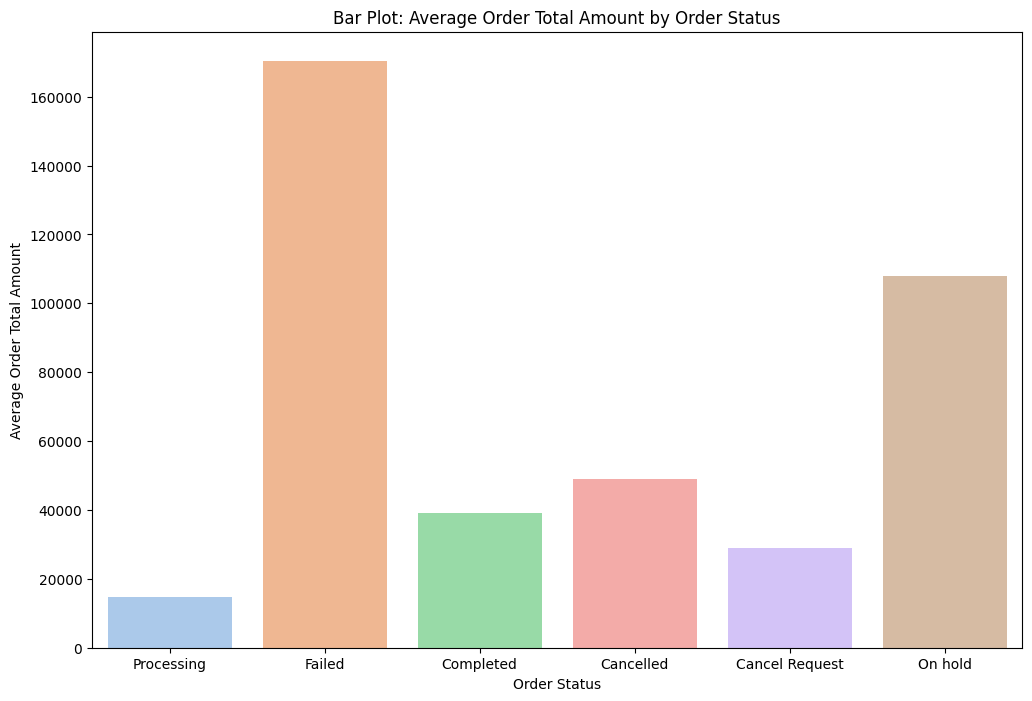

In [83]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Order Status', y='Order Total Amount', data=df, ci=None, palette='pastel')
plt.title('Bar Plot: Average Order Total Amount by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Average Order Total Amount')
plt.show()


### Analyzing Sales Over Time:

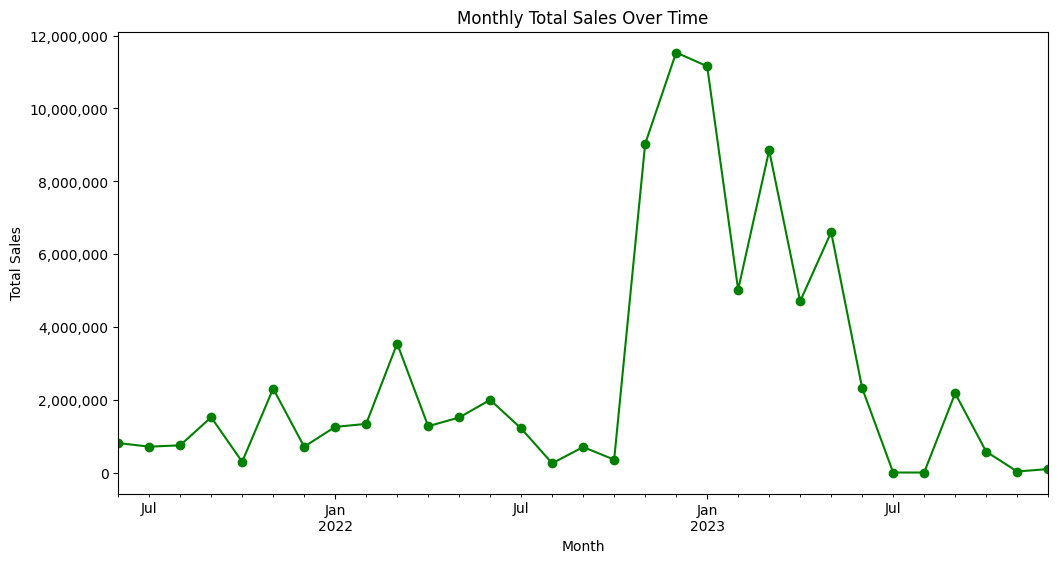

In [84]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample data to monthly and sum the total sales
monthly_sales = df['Order Total Amount'].resample('M').sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Format y-axis labels as integers
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


<ipython-input-85-5783a2c9005f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_Cancelled_products.values, y=top_Cancelled_products.index, palette='viridis')


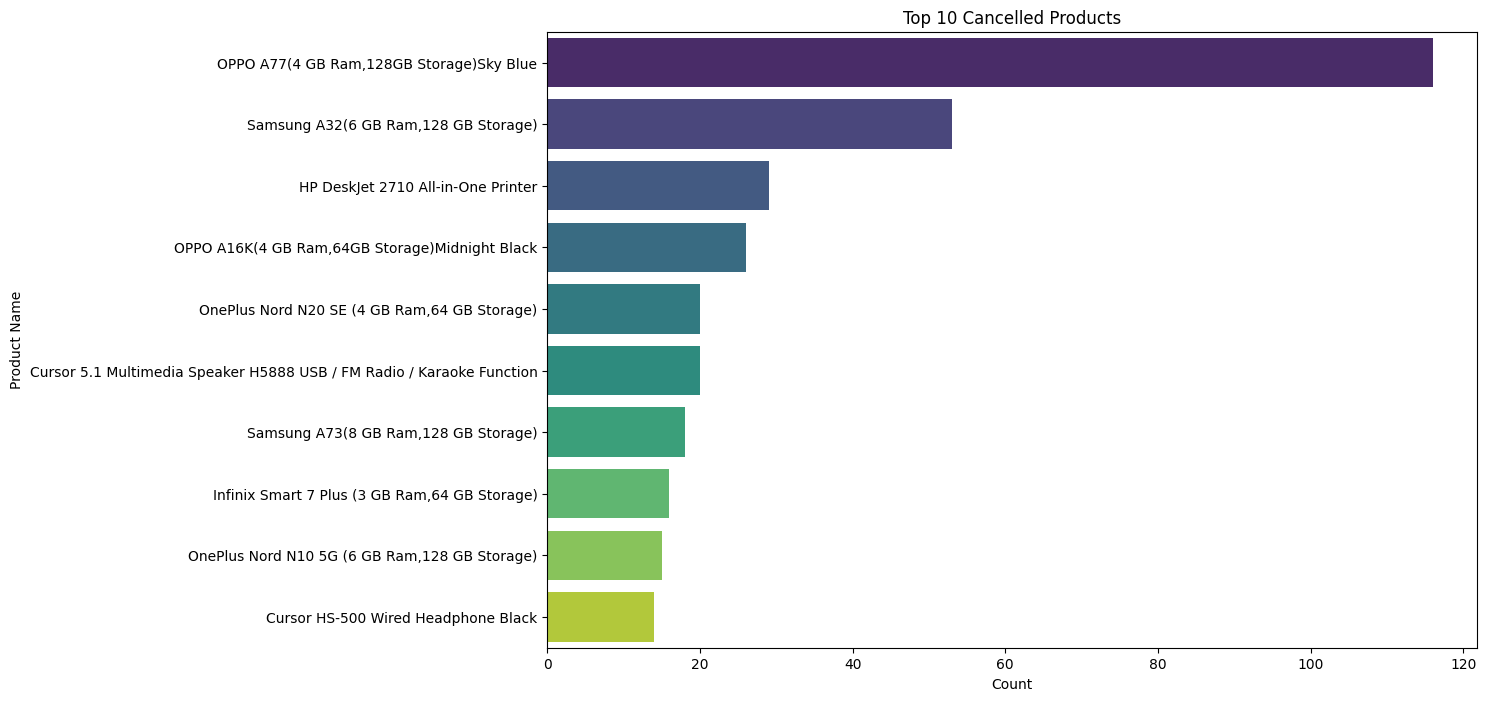

In [85]:
Cancelled_orders = df[df['Order Status'] == 'Cancelled']
top_Cancelled_products = Cancelled_orders['Item Name'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_Cancelled_products.values, y=top_Cancelled_products.index, palette='viridis')
plt.title('Top 10 Cancelled Products')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

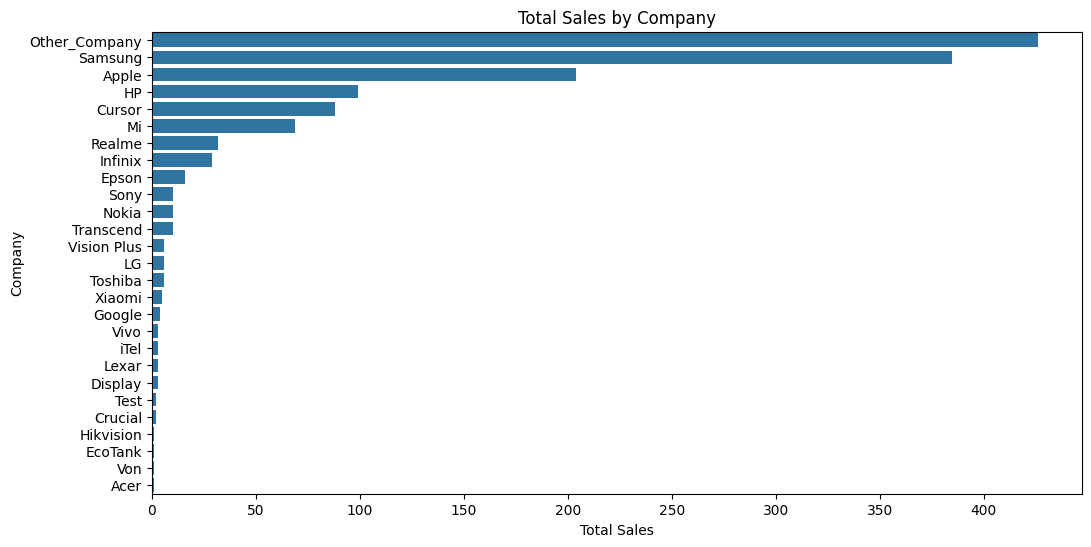

In [86]:

company_total_sales = df.groupby('Company').size().reset_index(name='Total Sales')
company_total_sales = company_total_sales.sort_values(by='Total Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Sales', y='Company', data=company_total_sales)
plt.title('Total Sales by Company')
plt.xlabel('Total Sales')
plt.ylabel('Company')
plt.show()


In [87]:
df.T

Order Date,2023-12-01 11:54:10,2023-12-01 11:54:10,2023-12-01 07:44:52,2023-11-10 12:00:40,2023-11-01 10:21:50,2023-10-22 07:14:09,2023-10-19 06:27:24,2023-10-16 15:23:25,2023-10-15 15:31:20,2023-10-13 15:44:45,...,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38
Order Number,25175,25175,25166,25101,25055,25035,25032,25024,25021,25008,...,20859,20860,20861,20862,20863,20864,20865,20866,20867,20868
Order Status,Processing,Processing,Failed,Processing,Completed,Completed,Cancelled,Cancelled,Processing,Cancel Request,...,Completed,Cancelled,Completed,Cancelled,Completed,Completed,Completed,Completed,Completed,Cancelled
First Name (Billing),Kungu,Kungu,Mary,Catherine,James,Yonko,Liza,Rodgers,Malcolm,Elizabeth,...,Gloria,Declan,LENZER,Millie,Millie,Stephen,Prince,Alieu,Sabastian,Jonathan
City (Billing),Nairobi,Nairobi,Nairobi,Wote,Nairobi,Nairobi,Chuka,South B,Nairobi,Nairobi,...,Kasarani,Juja,Nairobi,Ruiru,Ruiru,Nairobi,nairobi,nairobi,nairobi,Kahawa West Nairobi
State Code (Billing),KE30,KE30,KE30,KE23,KE30,KE30,KE41,KE30,KE30,KE30,...,KE30,KE13,KE38,KE13,KE13,KE30,KE30,KE30,KE30,KE30
First Name (Shipping),Kungu,Kungu,Mary,Catherine,James,Yonko,Liza,Rodgers,Malcolm,Elizabeth,...,Gloria,Declan,LENZER,Millie,Millie,Stephen,Prince,Alieu,Sabastian,Jonathan
City (Shipping),Nairobi,Nairobi,Nairobi,Wote,Nairobi,Nairobi,Chuka,South B,Nairobi,Nairobi,...,Kasarani,Juja,Nairobi,Ruiru,Ruiru,Nairobi,nairobi,nairobi,nairobi,Kahawa West Nairobi
Payment Method Title,Pay on delivery,Pay on delivery,DPO Payment Gateway (20% Payment Charges Extra.),Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,...,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,DPO Payment Gateway,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery
Order Subtotal Amount,4800,4800,69990,10895,16100,8528,103000,617,7244,28758,...,25000,32500,25000,21499,21499,120000,50000,160000,26000,52000
Shipping Method Title,Flat rate,Flat rate,Flat rate,Flat rate,Flat rate,Flat rate,Flat rate,Local Shop pickup,Local Shop pickup,Flat rate,...,Flat rate,Local Shop pickup,Flat rate,Flat rate,Flat rate,Flat rate,Local Shop pickup,Local Shop pickup,Flat rate,Flat rate


In [88]:
df['Profit'] = (df['Order Subtotal Amount'])- (df['Item Cost'])

df.head()

,Order Number,Order Status,First Name (Billing),City (Billing),State Code (Billing),First Name (Shipping),City (Shipping),Payment Method Title,Order Subtotal Amount,Shipping Method Title,Order Shipping Amount,Order Total Amount,SKU,Item Name,Category Name,Quantity,Item Cost,Company,Profit
Order Date,,,,,,,,,,,,,,,,,,,
2023-12-01 11:54:10,25175,Processing,Kungu,Nairobi,KE30,Kungu,Nairobi,Pay on delivery,4800,Flat rate,500,5300,MJK-CAR-101,HP 305 Black Ink Cartridge,Cartridge,1,2400,HP,2400
2023-12-01 11:54:10,25175,Processing,Kungu,Nairobi,KE30,Kungu,Nairobi,Pay on delivery,4800,Flat rate,500,5300,MJK-CAR-102,HP 305 Tri-color Ink Cartridge,Cartridge,1,2400,HP,2400
2023-12-01 07:44:52,25166,Failed,Mary,Nairobi,KE30,Mary,Nairobi,DPO Payment Gateway (20% Payment Charges Extra.),69990,Flat rate,500,84588,MJK-15102312-101,"Samsung 43"" UA43CU8000UXKE Crystal Smart TV - ...",Television,1,69990,Samsung,0
2023-11-10 12:00:40,25101,Processing,Catherine,Wote,KE23,Catherine,Wote,Pay on delivery,10895,Flat rate,500,11395,MJK-35401006-101,Magic Bullet MB4-1149M 11 Piece Set,Mixture,1,10895,Other_Company,0
2023-11-01 10:21:50,25055,Completed,James,Nairobi,KE30,James,Nairobi,Pay on delivery,16100,Flat rate,500,16600,MJK-PSS-F30-101,Yamaha Portable Keyboards PSS-F30,Keyboards,1,16100,Other_Company,0


In [89]:
from sklearn.preprocessing import LabelEncoder
order_status_mapping = {
    'Cancelled': 0,
    'Completed': 1,
    'failed': 2,
    'Cancel request': 0,
    'on hold': 3,
    'processing': 4
}

label_encoder = LabelEncoder()
df['Order Status Numerical'] = label_encoder.fit_transform(df['Order Status'].map(order_status_mapping))
print(df[['Order Status', 'Order Status Numerical']])


                    Order Status  Order Status Numerical
Order Date                                              
2023-12-01 11:54:10   Processing                       2
2023-12-01 11:54:10   Processing                       2
2023-12-01 07:44:52       Failed                       2
2023-11-10 12:00:40   Processing                       2
2023-11-01 10:21:50    Completed                       1
...                          ...                     ...
2021-06-01 09:50:38    Completed                       1
2021-06-01 09:50:38    Completed                       1
2021-06-01 09:50:38    Completed                       1
2021-06-01 09:50:38    Completed                       1
2021-06-01 09:50:38    Cancelled                       0

[1425 rows x 2 columns]


In [90]:
# Reset index to make 'Order Date' a regular column
df.reset_index(inplace=True)

# Now 'Order Date' will be a regular column in the DataFrame


In [91]:
# correlation_matrix = df.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [92]:
df.describe()

,Order Date,Order Number,Order Subtotal Amount,Order Shipping Amount,Order Total Amount,Quantity,Item Cost,Profit,Order Status Numerical
count,1425,1425.000000,1.425000e+03,1425.000000,1.425000e+03,1425.000000,1425.000000,1.425000e+03,1425.000000
mean,2022-11-05 19:15:56.397768192,21320.229474,5.653165e+04,343.719298,5.797467e+04,1.562105,44763.488421,1.176816e+04,0.600702
min,2021-06-01 09:50:38,20272.000000,5.000000e+00,0.000000,5.000000e+00,1.000000,5.000000,0.000000e+00,0.000000
25%,2022-11-07 11:25:41,20602.000000,1.850000e+04,400.000000,1.890000e+04,1.000000,17500.000000,0.000000e+00,0.000000
50%,2022-12-11 18:38:24,20959.000000,2.400000e+04,400.000000,2.450000e+04,1.000000,22000.000000,0.000000e+00,0.000000
75%,2023-03-01 15:28:58,21593.000000,4.950000e+04,500.000000,4.990000e+04,1.000000,42000.000000,0.000000e+00,1.000000
max,2023-12-01 11:54:10,25175.000000,1.723992e+06,1000.000000,1.724492e+06,11.000000,409200.000000,1.508493e+06,2.000000
std,NaN,1079.845497,1.093516e+05,196.325600,1.124931e+05,1.857409,54059.467710,8.061873e+04,0.698010


In [93]:
df.dtypes

Order Date                datetime64[ns]
Order Number                       int64
Order Status                      object
First Name (Billing)              object
City (Billing)                    object
State Code (Billing)              object
First Name (Shipping)             object
City (Shipping)                   object
Payment Method Title              object
Order Subtotal Amount              int64
Shipping Method Title             object
Order Shipping Amount              int64
Order Total Amount                 int64
SKU                               object
Item Name                         object
Category Name                     object
Quantity                           int64
Item Cost                          int64
Company                           object
Profit                             int64
Order Status Numerical             int64
dtype: object

In [94]:
#df.to_csv('/content/drive/MyDrive/modified_dataset.csv', index=False)
#from google.colab import files
#files.download('/content/drive/MyDrive/modified_dataset.csv')

In [95]:
import pandas as pd

# Group by 'City (Billing)' and 'City (Shipping)' columns and perform aggregation
grouped_data = df.groupby(['City (Billing)', 'City (Shipping)']).agg({'Order Number': 'count'}).reset_index()
grouped_data.rename(columns={'Order Number': 'Order_Count'}, inplace=True)
df = pd.merge(df, grouped_data, on=['City (Billing)', 'City (Shipping)'], how='left')

df.head()


,Order Date,Order Number,Order Status,First Name (Billing),City (Billing),State Code (Billing),First Name (Shipping),City (Shipping),Payment Method Title,Order Subtotal Amount,...,Order Total Amount,SKU,Item Name,Category Name,Quantity,Item Cost,Company,Profit,Order Status Numerical,Order_Count
0,2023-12-01 11:54:10,25175,Processing,Kungu,Nairobi,KE30,Kungu,Nairobi,Pay on delivery,4800,...,5300,MJK-CAR-101,HP 305 Black Ink Cartridge,Cartridge,1,2400,HP,2400,2,599
1,2023-12-01 11:54:10,25175,Processing,Kungu,Nairobi,KE30,Kungu,Nairobi,Pay on delivery,4800,...,5300,MJK-CAR-102,HP 305 Tri-color Ink Cartridge,Cartridge,1,2400,HP,2400,2,599
2,2023-12-01 07:44:52,25166,Failed,Mary,Nairobi,KE30,Mary,Nairobi,DPO Payment Gateway (20% Payment Charges Extra.),69990,...,84588,MJK-15102312-101,"Samsung 43"" UA43CU8000UXKE Crystal Smart TV - ...",Television,1,69990,Samsung,0,2,599
3,2023-11-10 12:00:40,25101,Processing,Catherine,Wote,KE23,Catherine,Wote,Pay on delivery,10895,...,11395,MJK-35401006-101,Magic Bullet MB4-1149M 11 Piece Set,Mixture,1,10895,Other_Company,0,2,3
4,2023-11-01 10:21:50,25055,Completed,James,Nairobi,KE30,James,Nairobi,Pay on delivery,16100,...,16600,MJK-PSS-F30-101,Yamaha Portable Keyboards PSS-F30,Keyboards,1,16100,Other_Company,0,1,599


In [96]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424
Order Date,2023-12-01 11:54:10,2023-12-01 11:54:10,2023-12-01 07:44:52,2023-11-10 12:00:40,2023-11-01 10:21:50,2023-10-22 07:14:09,2023-10-19 06:27:24,2023-10-16 15:23:25,2023-10-15 15:31:20,2023-10-13 15:44:45,...,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-03 14:02:46,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38,2021-06-01 09:50:38
Order Number,25175,25175,25166,25101,25055,25035,25032,25024,25021,25008,...,20859,20860,20861,20862,20863,20864,20865,20866,20867,20868
Order Status,Processing,Processing,Failed,Processing,Completed,Completed,Cancelled,Cancelled,Processing,Cancel Request,...,Completed,Cancelled,Completed,Cancelled,Completed,Completed,Completed,Completed,Completed,Cancelled
First Name (Billing),Kungu,Kungu,Mary,Catherine,James,Yonko,Liza,Rodgers,Malcolm,Elizabeth,...,Gloria,Declan,LENZER,Millie,Millie,Stephen,Prince,Alieu,Sabastian,Jonathan
City (Billing),Nairobi,Nairobi,Nairobi,Wote,Nairobi,Nairobi,Chuka,South B,Nairobi,Nairobi,...,Kasarani,Juja,Nairobi,Ruiru,Ruiru,Nairobi,nairobi,nairobi,nairobi,Kahawa West Nairobi
State Code (Billing),KE30,KE30,KE30,KE23,KE30,KE30,KE41,KE30,KE30,KE30,...,KE30,KE13,KE38,KE13,KE13,KE30,KE30,KE30,KE30,KE30
First Name (Shipping),Kungu,Kungu,Mary,Catherine,James,Yonko,Liza,Rodgers,Malcolm,Elizabeth,...,Gloria,Declan,LENZER,Millie,Millie,Stephen,Prince,Alieu,Sabastian,Jonathan
City (Shipping),Nairobi,Nairobi,Nairobi,Wote,Nairobi,Nairobi,Chuka,South B,Nairobi,Nairobi,...,Kasarani,Juja,Nairobi,Ruiru,Ruiru,Nairobi,nairobi,nairobi,nairobi,Kahawa West Nairobi
Payment Method Title,Pay on delivery,Pay on delivery,DPO Payment Gateway (20% Payment Charges Extra.),Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,...,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,DPO Payment Gateway,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery,Pay on delivery
Order Subtotal Amount,4800,4800,69990,10895,16100,8528,103000,617,7244,28758,...,25000,32500,25000,21499,21499,120000,50000,160000,26000,52000


In [97]:
df.dtypes

Order Date                datetime64[ns]
Order Number                       int64
Order Status                      object
First Name (Billing)              object
City (Billing)                    object
State Code (Billing)              object
First Name (Shipping)             object
City (Shipping)                   object
Payment Method Title              object
Order Subtotal Amount              int64
Shipping Method Title             object
Order Shipping Amount              int64
Order Total Amount                 int64
SKU                               object
Item Name                         object
Category Name                     object
Quantity                           int64
Item Cost                          int64
Company                           object
Profit                             int64
Order Status Numerical             int64
Order_Count                        int64
dtype: object

In [98]:
pip install category_encoders


In [99]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def frequency_encode(column):
    frequency_map = column.value_counts(normalize=True)
    return column.map(frequency_map)

categorical_columns = ['Company', 'City (Billing)', 'Category Name', 'City (Shipping)']
for col in categorical_columns:
    df[col+'_encoded'] = frequency_encode(df[col])

print(df.head())


           Order Date  Order Number Order Status First Name (Billing)  \
0 2023-12-01 11:54:10         25175   Processing                Kungu   
1 2023-12-01 11:54:10         25175   Processing                Kungu   
2 2023-12-01 07:44:52         25166       Failed                 Mary   
3 2023-11-10 12:00:40         25101   Processing            Catherine   
4 2023-11-01 10:21:50         25055    Completed                James   

  City (Billing) State Code (Billing) First Name (Shipping) City (Shipping)  \
0        Nairobi                 KE30                 Kungu         Nairobi   
1        Nairobi                 KE30                 Kungu         Nairobi   
2        Nairobi                 KE30                  Mary         Nairobi   
3           Wote                 KE23             Catherine            Wote   
4        Nairobi                 KE30                 James         Nairobi   

                               Payment Method Title  Order Subtotal Amount  \
0       

In [100]:
df.dtypes

Order Date                 datetime64[ns]
Order Number                        int64
Order Status                       object
First Name (Billing)               object
City (Billing)                     object
State Code (Billing)               object
First Name (Shipping)              object
City (Shipping)                    object
Payment Method Title               object
Order Subtotal Amount               int64
Shipping Method Title              object
Order Shipping Amount               int64
Order Total Amount                  int64
SKU                                object
Item Name                          object
Category Name                      object
Quantity                            int64
Item Cost                           int64
Company                            object
Profit                              int64
Order Status Numerical              int64
Order_Count                         int64
Company_encoded                   float64
City (Billing)_encoded            

In [101]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
Index(['Order Date', 'Order Number', 'Order Subtotal Amount',
       'Order Shipping Amount', 'Order Total Amount', 'Quantity', 'Item Cost',
       'Profit', 'Order Status Numerical', 'Order_Count', 'Company_encoded',
       'City (Billing)_encoded', 'Category Name_encoded',
       'City (Shipping)_encoded'],
      dtype='object')

Categorical Columns:
Index(['Order Status', 'First Name (Billing)', 'City (Billing)',
       'State Code (Billing)', 'First Name (Shipping)', 'City (Shipping)',
       'Payment Method Title', 'Shipping Method Title', 'SKU', 'Item Name',
       'Category Name', 'Company'],
      dtype='object')


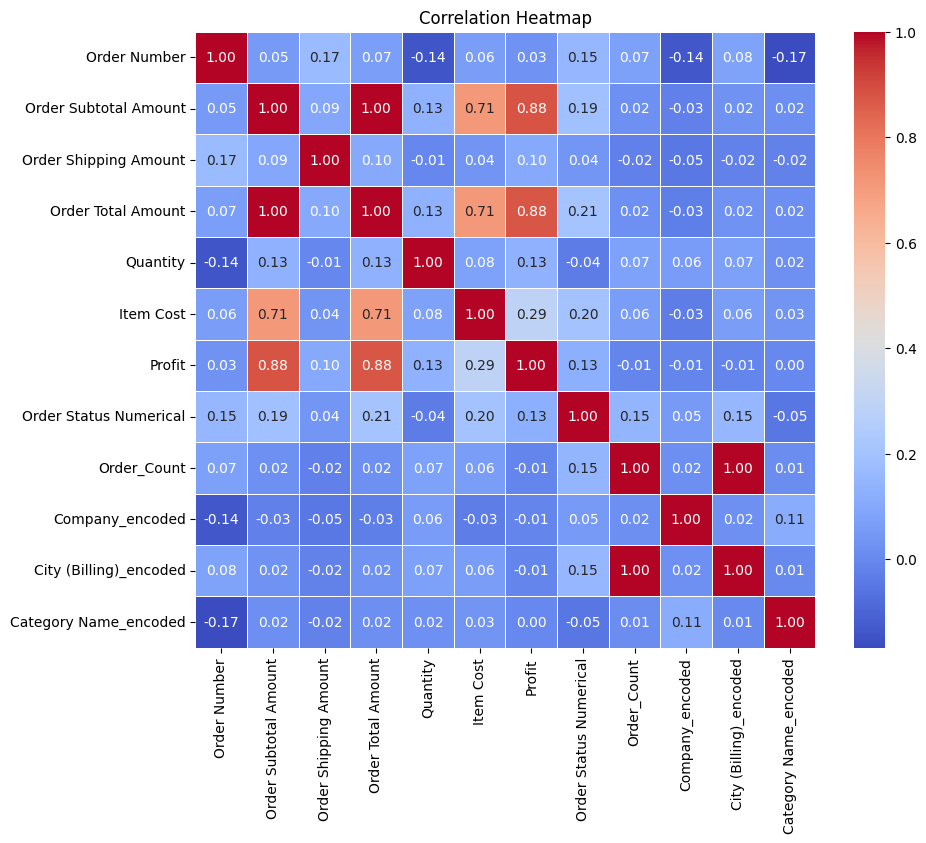

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


columns_for_correlation = [
    'Order Number', 'Order Subtotal Amount', 'Order Shipping Amount',
       'Order Total Amount', 'Quantity', 'Item Cost', 'Profit',
       'Order Status Numerical', 'Order_Count', 'Company_encoded',
       'City (Billing)_encoded', 'Category Name_encoded'
]


correlation_matrix = df[columns_for_correlation].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


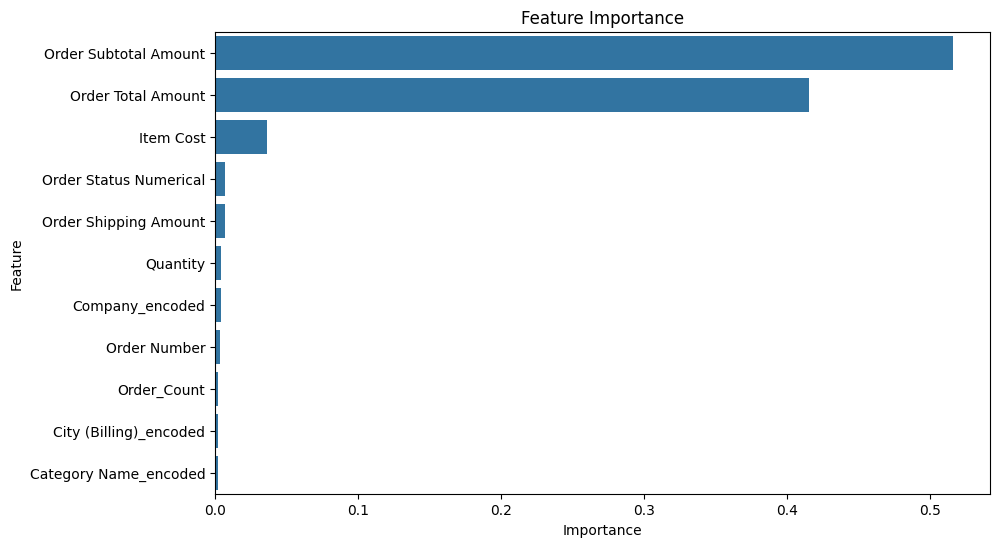

In [103]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = [
    'Order Number', 'Order Subtotal Amount', 'Order Shipping Amount',
       'Order Total Amount', 'Quantity', 'Item Cost',
       'Order Status Numerical', 'Order_Count', 'Company_encoded',
       'City (Billing)_encoded', 'Category Name_encoded'
]

# Features
X = df[numerical_columns]

# Target variable
y = df['Profit']

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Creating DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [104]:
import pandas as pd
# List of float64 columns
float64_columns = ['Company_encoded', 'City (Billing)_encoded', 'Category Name_encoded', 'City (Shipping)_encoded','Order Total Amount']

# Convert float64 columns to int64
df[float64_columns] = df[float64_columns].astype('int64')
print(df.dtypes)


Order Date                 datetime64[ns]
Order Number                        int64
Order Status                       object
First Name (Billing)               object
City (Billing)                     object
State Code (Billing)               object
First Name (Shipping)              object
City (Shipping)                    object
Payment Method Title               object
Order Subtotal Amount               int64
Shipping Method Title              object
Order Shipping Amount               int64
Order Total Amount                  int64
SKU                                object
Item Name                          object
Category Name                      object
Quantity                            int64
Item Cost                           int64
Company                            object
Profit                              int64
Order Status Numerical              int64
Order_Count                         int64
Company_encoded                     int64
City (Billing)_encoded            

In [105]:
import pandas as pd

# Drop 'Order Total Amount' and 'Order Shipping Amount' columns
df.drop(['Order Total Amount', 'Order Shipping Amount'], axis=1, inplace=True)

# Rename 'Order Subtotal Amount' column to 'Order Amount'
df.rename(columns={'Order Subtotal Amount': 'Order Amount'}, inplace=True)

# Display the modified dataframe
print(df)


              Order Date  Order Number Order Status First Name (Billing)  \
0    2023-12-01 11:54:10         25175   Processing                Kungu   
1    2023-12-01 11:54:10         25175   Processing                Kungu   
2    2023-12-01 07:44:52         25166       Failed                 Mary   
3    2023-11-10 12:00:40         25101   Processing            Catherine   
4    2023-11-01 10:21:50         25055    Completed                James   
...                  ...           ...          ...                  ...   
1420 2021-06-01 09:50:38         20864    Completed              Stephen   
1421 2021-06-01 09:50:38         20865    Completed               Prince   
1422 2021-06-01 09:50:38         20866    Completed                Alieu   
1423 2021-06-01 09:50:38         20867    Completed            Sabastian   
1424 2021-06-01 09:50:38         20868    Cancelled             Jonathan   

           City (Billing) State Code (Billing) First Name (Shipping)  \
0              

In [106]:
df.columns

Index(['Order Date', 'Order Number', 'Order Status', 'First Name (Billing)',
       'City (Billing)', 'State Code (Billing)', 'First Name (Shipping)',
       'City (Shipping)', 'Payment Method Title', 'Order Amount',
       'Shipping Method Title', 'SKU', 'Item Name', 'Category Name',
       'Quantity', 'Item Cost', 'Company', 'Profit', 'Order Status Numerical',
       'Order_Count', 'Company_encoded', 'City (Billing)_encoded',
       'Category Name_encoded', 'City (Shipping)_encoded'],
      dtype='object')

In [107]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'Order Date' column
# Convert 'Order Date' column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Remove the time component and keep only the date
df['Order Date'] = df['Order Date'].dt.date

# Now the 'Order Date' column will contain only the date component without the time
df.head()

,Order Date,Order Number,Order Status,First Name (Billing),City (Billing),State Code (Billing),First Name (Shipping),City (Shipping),Payment Method Title,Order Amount,...,Quantity,Item Cost,Company,Profit,Order Status Numerical,Order_Count,Company_encoded,City (Billing)_encoded,Category Name_encoded,City (Shipping)_encoded
0,2023-12-01,25175,Processing,Kungu,Nairobi,KE30,Kungu,Nairobi,Pay on delivery,4800,...,1,2400,HP,2400,2,599,0,0,0,0
1,2023-12-01,25175,Processing,Kungu,Nairobi,KE30,Kungu,Nairobi,Pay on delivery,4800,...,1,2400,HP,2400,2,599,0,0,0,0
2,2023-12-01,25166,Failed,Mary,Nairobi,KE30,Mary,Nairobi,DPO Payment Gateway (20% Payment Charges Extra.),69990,...,1,69990,Samsung,0,2,599,0,0,0,0
3,2023-11-10,25101,Processing,Catherine,Wote,KE23,Catherine,Wote,Pay on delivery,10895,...,1,10895,Other_Company,0,2,3,0,0,0,0
4,2023-11-01,25055,Completed,James,Nairobi,KE30,James,Nairobi,Pay on delivery,16100,...,1,16100,Other_Company,0,1,599,0,0,0,0


In [108]:
# Separate int64 columns
df_numerical = df.select_dtypes(include=['int64', 'datetime64[ns]'])

# Separate object columns
df_cat = df.select_dtypes(include=['object'])

df_numerical.T

,0,1,2,3,4,5,6,7,8,9,...,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424
Order Number,25175,25175,25166,25101,25055,25035,25032,25024,25021,25008,...,20859,20860,20861,20862,20863,20864,20865,20866,20867,20868
Order Amount,4800,4800,69990,10895,16100,8528,103000,617,7244,28758,...,25000,32500,25000,21499,21499,120000,50000,160000,26000,52000
Quantity,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9
Item Cost,2400,2400,69990,10895,16100,8528,103000,617,7244,9593,...,25000,32500,25000,21499,21499,120000,25000,160000,26000,52000
Profit,2400,2400,0,0,0,0,0,0,0,19165,...,0,0,0,0,0,0,25000,0,0,0
Order Status Numerical,2,2,2,2,1,1,0,0,2,2,...,1,0,1,0,1,1,1,1,1,0
Order_Count,599,599,599,3,599,599,3,1,599,599,...,9,7,599,18,18,599,89,89,89,5
Company_encoded,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
City (Billing)_encoded,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Category Name_encoded,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# !pip install lazypredict


In [110]:
# from lazypredict.Supervised import LazyRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X = df_numerical.drop(columns=['Profit'])
# y = df_numerical['Profit']

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize LazyRegressor
# reg = LazyRegressor(predictions=True)

# # Fit and predict using LazyRegressor
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# # Print the R-squared score for each model
# print(models)


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from math import sqrt

# Assuming your target variable is 'Profit' or any other target you want to predict
target_variable = 'Profit'

# Assuming 'int64_df' is your DataFrame containing only int64 columns
X = df_numerical.drop(columns=[target_variable])
y = df_numerical[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regressors to loop through
regressors = [
    ('Extra Trees Regressor', ExtraTreesRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('XGB Regressor', XGBRegressor()),
    ('Bagging Regressor', BaggingRegressor()),
    ('Decision Tree Regressor', DecisionTreeRegressor())
]

# Iterate over regressors
for reg_name, reg in regressors:
    # Train the regressor
    reg.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = reg.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)  # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics for each model
    print(f"Evaluation metrics for {reg_name}:")
    print(f"Mean Squared Error: {mse: .4f}")
    print(f"Root Mean Squared Error: {rmse: .4f}")  # Print RMSE
    print(f"Mean Absolute Error: {mae: .4f}")
    print(f"R-squared Score: {r2: .4f}")
    print("--------------------------------------------------------")


Evaluation metrics for Extra Trees Regressor:
Mean Squared Error:  53641527.3823
Root Mean Squared Error:  7324.0376
Mean Absolute Error:  1090.2012
R-squared Score:  0.9968
--------------------------------------------------------
Evaluation metrics for Gradient Boosting Regressor:
Mean Squared Error:  376873047.0674
Root Mean Squared Error:  19413.2184
Mean Absolute Error:  2458.6132
R-squared Score:  0.9775
--------------------------------------------------------
Evaluation metrics for Random Forest Regressor:
Mean Squared Error:  752203248.6492
Root Mean Squared Error:  27426.3240
Mean Absolute Error:  3062.8048
R-squared Score:  0.9550
--------------------------------------------------------
Evaluation metrics for XGB Regressor:
Mean Squared Error:  851061389.6192
Root Mean Squared Error:  29172.9565
Mean Absolute Error:  2711.3806
R-squared Score:  0.9491
--------------------------------------------------------
Evaluation metrics for Bagging Regressor:
Mean Squared Error:  6735466

In [112]:
X_train

,Order Number,Order Amount,Quantity,Item Cost,Order Status Numerical,Order_Count,Company_encoded,City (Billing)_encoded,Category Name_encoded,City (Shipping)_encoded
1138,20571,163000,11,163000,2,89,0,0,0,0
31,24849,66499,1,66499,1,599,0,0,0,0
210,22202,163000,1,163000,0,7,0,0,0,0
1173,20608,12900,1,12900,1,53,0,0,0,0
1106,20541,53000,9,53000,0,599,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1095,20530,20000,1,20000,1,4,0,0,0,0
1130,20565,37000,1,37000,2,599,0,0,0,0
1294,20747,21499,5,21499,1,53,0,0,0,0
860,20401,17500,1,17500,0,45,0,0,0,0


In [113]:
X_test

,Order Number,Order Amount,Quantity,Item Cost,Order Status Numerical,Order_Count,Company_encoded,City (Billing)_encoded,Category Name_encoded,City (Shipping)_encoded
628,21079,6200,1,6200,0,599,0,0,0,0
680,21015,499,1,499,0,1,0,0,0,0
1085,20520,20000,1,20000,1,89,0,0,0,0
578,21143,6200,1,6200,0,6,0,0,0,0
1010,20355,18999,1,18999,0,24,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1000,20831,25000,1,25000,0,599,0,0,0,0
1119,20554,24000,1,24000,0,599,0,0,0,0
917,20415,23999,1,23999,0,599,0,0,0,0
889,20408,21499,1,21499,0,18,0,0,0,0


In [114]:
import pickle
pickle.dump(reg, open('model.pkl', 'wb'))

In [115]:
from flask import Flask, request, jsonify
import pickle

# Load the model
model = pickle.load(open('model.pkl', 'rb'))

app = Flask(__name__)

# Define an endpoint for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the JSON data from the request
    data = request.json

    # Perform any necessary preprocessing

    # Make predictions using the model
    prediction = model.predict(data)

    # Return the prediction as JSON
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [116]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>